In [1]:
# POPULATION ANALYSIS - TRAINED DATA, no familiarity effect. regulation carries on

# import list
%reload_ext autoreload
%autoreload 2

import os
import pickle
import numpy as np
import pandas as pd
#import main_funcs as mfun
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import glob as glob
from datetime import datetime
from scipy import stats
import plot_funcs as pfun
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from sklearn import preprocessing
# from scipy import stats
# from itertools import compress

#import warnings
#warnings.filterwarnings("ignore", category=RuntimeWarning) 

# set matlab API
import matlab.engine
eng = matlab.engine.start_matlab()
print('Matlab engine is set correctly.')

analysis_path = r'C:\Users\Huriye\Documents\code\trainingInducedPlasticity\info_data'
data_path = r'C:\Users\Huriye\Documents\code\trainingInducedPlasticity\info_data'
savefigpath = r'G:\My Drive\Manuscripts\1Training4by4paper\TrainingInduced_figures'


Matlab engine is set correctly.


In [ ]:
# Plot BF maps from matlab code

eng.plotBestFrequencyMaps(savefigpath,  nargout=0) # run matlab code to get BF plots

In [ ]:
# Plot PPF control figure/ permutation  from matlab code
eng.plot_PPF_Permutation(savefigpath,  nargout=0) # run matlab code to get BF plots

In [2]:
# Figure 2: Timbre Feature Exploration
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))

# set gridspecs
gs_behavior  = fig.add_gridspec(ncols=2, nrows=1, bottom=0.77, top=0.95, right=0.38, left=0.05,
                              wspace=0.4, hspace=0.4)
gs_map       = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.70, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4) # Leave empty space for cortical map created by MATLAB Code
gs_timbreSSA = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)

vowel_samples = fig.add_gridspec(ncols=2, nrows=1, bottom=0.77, top=0.95, right=0.85, left=0.45,
                              wspace=0.3, hspace=0.4)
gs_f2SSA      = fig.add_gridspec(ncols=1, nrows=1, bottom=0.47, top=0.70, right=0.85, left=0.45,
                              wspace=0.2, hspace=0.4)
gs_timbreSSA_acrossfields = fig.add_gridspec(ncols=1, nrows=4, bottom=0.05, top=0.40, right=0.85, left=0.45,
                                wspace=0.2, hspace=0)

# Panel A - B:  plot behaviour results: A - B
ax_gs_behavior = {xx: fig.add_subplot(gs_behavior[xx]) for xx in range(2)}
pfun.plotBehaviorTimbre (ax_gs_behavior )

# Panel C: plot timbre auditory cortex maps : tHIS WILL BE A SEPARATE FIGURE
# Panel D: plot timbre SSA
ax_gs_timbreSSA = {xx: fig.add_subplot(gs_timbreSSA[xx]) for xx in range(1)}
pfun.plotSSAacrossfields (eng,  'Timbre', ax_gs_timbreSSA[0] )

# Panel E: plot vowel samples
ax_vowel_samples = {xx: fig.add_subplot(vowel_samples[xx]) for xx in range(2)}
pfun.plotVowelSamples (ax_vowel_samples )

# Panel F: plot F2 SSA
ax_gs_f2SSA = {xx: fig.add_subplot(gs_f2SSA[xx]) for xx in range(1)}
pfun.plotVowelSSA (eng, 'Timbre',ax_gs_f2SSA )

# Panel G: plot timbre SSA across fields
ax_gs_timbreSSA_acrossfields = {xx: fig.add_subplot(gs_timbreSSA_acrossfields[xx]) for xx in range(4)}
pfun.plotVowelSSAacrossfields (eng,  'Timbre', 'A1', ax_gs_timbreSSA_acrossfields[0] )
pfun.plotVowelSSAacrossfields (eng,  'Timbre', 'AAF', ax_gs_timbreSSA_acrossfields[1] )
pfun.plotVowelSSAacrossfields (eng,  'Timbre', 'PPF', ax_gs_timbreSSA_acrossfields[2] )
pfun.plotVowelSSAacrossfields (eng,  'Timbre', 'PSF', ax_gs_timbreSSA_acrossfields[3] )

# List of your gridspecs
axes = [ax_gs_behavior, ax_gs_timbreSSA, ax_vowel_samples, ax_gs_f2SSA, ax_gs_timbreSSA_acrossfields]

# Corresponding labels
labels = ['A','B', 'D', 'E','F','G','H' ]
lInd = 0

for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<2:
            ax[key].text(-0.3, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>1 and lInd<7:
            ax[key].text(-0.1, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
plt.tight_layout()
savefigname = 'Figure2_TimbreRepresentation'
pfun.save_figure(savefigname,savefigpath)
plt.close()

# Mixed Effect Model
all_data = pfun.generateDataValuesForMixedEffectModel(eng)
formula = "Value ~ C(TrainingGroup)*C(Field)*C(VowelPair)"
mixed_effects_model = smf.mixedlm(formula, all_data, groups=all_data['Value'])

# Fit the model
mixed_effects_result = mixed_effects_model.fit()

# Print the summary
print(mixed_effects_result.summary())
# Convert the summary result to HTML
summary = mixed_effects_result.summary()
summary_html = summary.as_html()

# Write the HTML string to a file
saveName = savefigpath + '\mixed-model-summary.html'
with open(saveName, 'w') as f:
    f.write(summary_html)
    

c:\Users\Huriye\anaconda3\envs\decision-making-ev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Huriye\anaconda3\envs\decision-making-ev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Huriye\AppData\Local\Temp\ipykernel_15936\2413872069.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
c:\Users\Huriye\anaconda3\envs\decision-making-ev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Huriye\anaconda3\envs\decision-making-ev\l

                          Mixed Linear Model Regression Results
Model:                        MixedLM            Dependent Variable:            Value     
No. Observations:             2387               Method:                        REML      
No. Groups:                   2347               Scale:                         0.0000    
Min. group size:              1                  Log-Likelihood:                -8229.1005
Max. group size:              3                  Converged:                     Yes       
Mean group size:              1.0                                                         
------------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                       5.114    0.637  8.029 0.000   3.866  6.363
C(TrainingGroup)[T.T/PGNG]

In [3]:
# Figure 3: Pitch/F0 Feature Exploration
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))

# set gridspecs
gs_behavior  = fig.add_gridspec(ncols=2, nrows=1, bottom=0.77, top=0.95, right=0.38, left=0.05,
                              wspace=0.4, hspace=0.4)
gs_map       = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.70, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)# Leave empty space for cortical map created by MATLAB Code
gs_pitchSSA = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)

# Panel A - B:  plot behaviour results: A - B
ax_gs_behavior = {xx: fig.add_subplot(gs_behavior[xx]) for xx in range(2)}
pfun.plotBehaviorPitch (ax_gs_behavior )

# Panel C: plot pitch auditory cortex maps : tHIS WILL BE A SEPARATE FIGURE
# Panel D: plot pitch SSA
ax_gs_pitchSSA = {xx: fig.add_subplot(gs_pitchSSA[xx]) for xx in range(1)}
pfun.plotSSAacrossfields (eng,  'F0', ax_gs_pitchSSA[0] )

# List of your gridspecs
axes = [ax_gs_behavior, ax_gs_pitchSSA]

# Corresponding labels
labels = ['A','B', 'D']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        ax[key].text(-0.4, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                    fontweight='bold', va='top', ha='right',
                    bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
plt.tight_layout()
savefigname = 'Figure3_PitchRepresentation'
pfun.save_figure(savefigname,savefigpath)
plt.close()


c:\Users\Huriye\anaconda3\envs\decision-making-ev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Huriye\AppData\Local\Temp\ipykernel_15936\514613011.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
c:\Users\Huriye\anaconda3\envs\decision-making-ev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [9]:
# Figure 4: Space Feature Exploration
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))

# set gridspecs

gs_map       = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.70, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)# Leave empty space for cortical map created by MATLAB Code above
gs_spaceSSA = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)
gs_spaceSpikeRates = fig.add_gridspec(ncols=3, nrows=1, bottom=0.40, top=0.70, right=0.85, left=0.43,
                              wspace=0.4, hspace=0.2)
gs_spaceGLM = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.85, left=0.70,
                              wspace=0.2, hspace=0)


# Panel A: plot pitch auditory cortex maps : THIS WILL BE A SEPARATE FIGURE created by MATLAB code above
# Panel B: plot pitch SSA
ax_gs_spaceSSA = {xx: fig.add_subplot(gs_spaceSSA[xx]) for xx in range(1)}
pfun.plotSSAacrossfields (eng,  'Space', ax_gs_spaceSSA[0] )

# Panel C: normalisation panels
ax_gs_spaceSpikeRates = {xx: fig.add_subplot(gs_spaceSpikeRates[xx]) for xx in range(3)}
pfun.plotSRNormalisation (eng,  'Space', ax_gs_spaceSpikeRates )

# Panel D: GLM panels
ax_gs_spaceGLM = {xx: fig.add_subplot(gs_spaceGLM[xx]) for xx in range(1)}
pfun.plotCoefForGLM ( eng, 'Space', ax_gs_spaceGLM[0], savefigpath)

# Lets add the labels
axes = [ax_gs_spaceSSA, ax_gs_spaceSpikeRates, ax_gs_spaceGLM]
labels = ['B','C', 'D', 'E','F']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd==0:
            ax[key].text(-0.05, 1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif (lInd>0 and lInd<4):
            ax[key].text(-0.3, 1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>3:
            ax[key].text(-1.9,1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
plt.tight_layout()
savefigname = 'Figure4_SpaceRepresentation'
pfun.save_figure(savefigname,savefigpath)
plt.close()


c:\Users\Huriye\anaconda3\envs\decision-making-ev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


                                    Mixed Linear Model Regression Results
Model:                              MixedLM                   Dependent Variable:                   spike_rate
No. Observations:                   4880                      Method:                               REML      
No. Groups:                         1220                      Scale:                                0.1815    
Min. group size:                    4                         Log-Likelihood:                       -6205.3737
Max. group size:                    4                         Converged:                            Yes       
Mean group size:                    4.0                                                                       
--------------------------------------------------------------------------------------------------------------
                                                                   Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------

C:\Users\Huriye\AppData\Local\Temp\ipykernel_15936\3328533483.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
c:\Users\Huriye\anaconda3\envs\decision-making-ev\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [ ]:
## Create the boxplots = Across  different parameters

# Get data from Matlab structure in numpy arrays
timbre_data = np.array(eng. prepareSSAData('Timbre', nargout=1))
pitch_data = np.array(eng. prepareSSAData('Pitch', nargout=1))
control_data = np.array(eng. prepareSSAData('Control', nargout=1))

# Define the fields and their corresponding codes in column 7 of the data
fields = {1: 'A1', 2: 'AAF', 3: 'PPF', 4: 'PSF'}

# Define the auditory features 
range_names = ['Timbre', 'F0', 'Space', 'Space-F0', 'Space-Timbre', 'F0-Timbre']
colors =[(0.3, 0.3, 0.3), (0.8, 0, 1), (0, 0.4, 1)]

# Create the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(18, 12)) # Adjust the size as needed
axs = axs.flatten() # Flatten the array to make it easier to index
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Iterate over the ranges and fields to plot
for i, range_name in enumerate(range_names):
    ax = axs[i]

    # We will collect the box plot data and positions here
    box_data = []

    # Prepare data for boxplot for each field
    for j, (field_code, field_name) in enumerate(fields.items(), start=1):
        # Check if there is data for the given field in the Control dataset
        if np.any(control_data[:, 6] == field_code):
            df = pd.DataFrame()
            df['Value'] = control_data[control_data[:, 6] == field_code, i]
            df['Type'] = 'Control'
            df['Field'] = field_name
            box_data.append(df)

        # Check if there is data for the given field in the Timbre dataset
        if np.any(timbre_data[:, 6] == field_code):
            df = pd.DataFrame()
            df['Value'] = timbre_data[timbre_data[:, 6] == field_code, i]
            df['Type'] = '2 AFC'
            df['Field'] = field_name
            box_data.append(df)

        # Check if there is data for the given field in the Pitch dataset
        if np.any(pitch_data[:, 6] == field_code):
            df = pd.DataFrame()
            df['Value'] = pitch_data[pitch_data[:, 6] == field_code, i]
            df['Type'] = 'T/P GNG'
            df['Field'] = field_name
            box_data.append(df)

    # Concatenate all dataframes
    all_data = pd.concat(box_data)

    # Plot the boxplot using seaborn
    sns.swarmplot(x='Field', y='Value', hue='Type', data=all_data, palette=colors, ax=ax, size = 3, dodge=True)
    #boxplot(x='Field', y='Value', hue='Type', data=all_data, palette=colors, ax=ax, showfliers=False )
    # Set the title for each subplot
    ax.set_title(range_name)

    # Set the y-axis label
    ax.set_ylabel('% Variance explained')
    

# Set a super title for the entire figure
plt.suptitle('Parameter Variance by Field')
plt.show()

plt.tight_layout()
savefigname = 'SSA_swarmplots'
pfun.save_figure(savefigname,savefigpath)
plt.close()


In [ ]:
# Normalisation Plots
gs_spaceSpikeRates = fig.add_gridspec(ncols=1, nrows=3, bottom=0.05, top=0.70, right=0.85, left=0.50,
                              wspace=0.2, hspace=0.4)
ax_gs_spaceSpikeRates = {xx: fig.add_subplot(gs_spaceSpikeRates[xx]) for xx in range(3)}

# Define the feature types and training groups
featureTypes = 'Space' # Space 0, F0 1, Timbre 2
featureInd = 0
trainingGroups = ['Timbre', 'Pitch' ,'Control']

# Create a figure and axis for plotting
markers = {'Timbre': 'o', 'Pitch': 'd', 'Control': 's'}
colors = {'Timbre': 'magenta', 'Pitch': 'blue', 'Control': 'gray'}

for i, group_type in enumerate(trainingGroups):
    ax = ax_gs_spaceSpikeRates[i] 
    normalised = np.array(eng.extractData(group_type, 'resp'))
    matStim = np.array(eng.extractData(group_type, 'stim'))

    # Get unique subFeatures from matStim
    subFeatures = np.unique(matStim[:,featureInd])
    df = np.empty((0,0))
    for stim in subFeatures:
        # Extract the normalized data for the current stimulus
        current_data = normalised[matStim[:,featureInd] == stim].flatten()

        if df.size == 0:
            df = np.atleast_2d(current_data)
        else:
            # If the sizes don't match, either truncate or pad current_data
            if df.shape[1] > current_data.shape[0]:  # if df has more columns
                # Pad current_data with zeros
                current_data = np.pad(current_data, (0, df.shape[1] - current_data.shape[0]), mode='constant', constant_values = np.nan)
            elif df.shape[1] < current_data.shape[0]:  # if current_data has more columns
                # Truncate current_data
                current_data = current_data[:df.shape[1]]
            
            df = np.vstack((df, current_data))
         
    new_df = np.zeros(df.shape)  # This creates an empty array of the same shape as df
    for index in range(df.shape[1]):
        new_df[:, index] = (df[:, index] - np.nanmean(df[:, index])) / (np.nanstd(df[:, index])/ np.sqrt(df[:, index].shape[0]))

    means = np.nanmean(new_df, axis=1)
    errors = np.nanstd(new_df, axis=1) / np.sqrt(df.shape[1])

    # Plot the data with error bars
    ax.errorbar(subFeatures, means, yerr=errors, fmt=markers[group_type], color=colors[group_type], label=group_type if stim == -45 else "")

    #Set the x-axis and y-axis labels
    ax.set_xlabel('Location (degree)')
    ax.set_ylabel('Normalized spike rate (Hz)')
    ax.set_ylim([-0.15, 0.15])

plt.show()

                                    Mixed Linear Model Regression Results
Model:                              MixedLM                   Dependent Variable:                   spike_rate
No. Observations:                   4880                      Method:                               REML      
No. Groups:                         1220                      Scale:                                0.1815    
Min. group size:                    4                         Log-Likelihood:                       -6205.3737
Max. group size:                    4                         Converged:                            Yes       
Mean group size:                    4.0                                                                       
--------------------------------------------------------------------------------------------------------------
                                                                   Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------

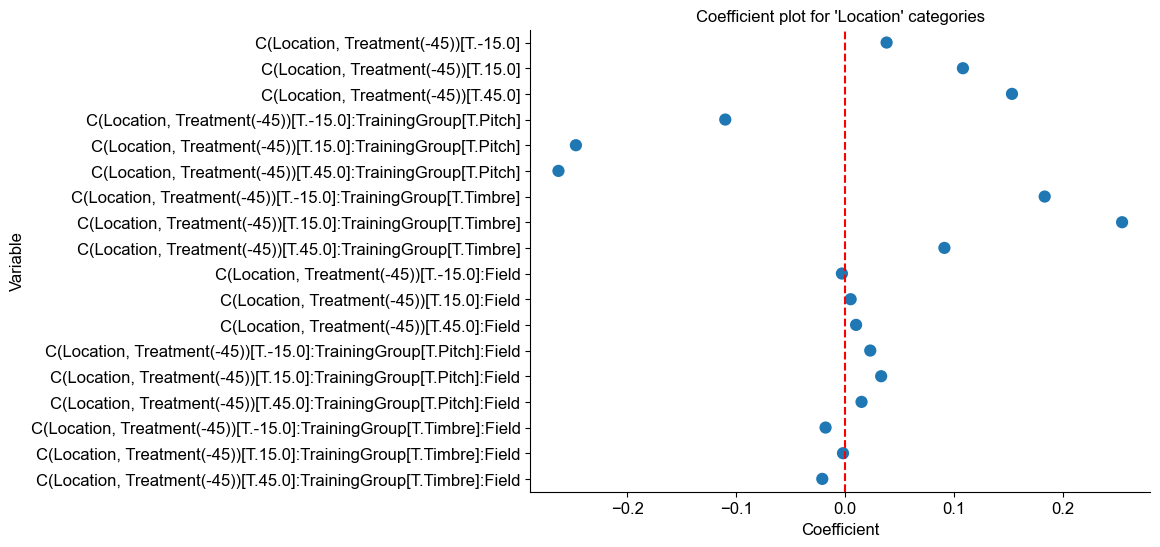

In [819]:
# GLM Plots
import statsmodels.formula.api as smf

pfun.generateDataForGLM(eng, 'Space')
# Define the GLM model with unit as a random effect
md = smf.mixedlm("spike_rate ~ C(Location, Treatment(-45)) * TrainingGroup * Field", 
                 df, groups=df["Unit"])
mdf = md.fit()
print(mdf.summary())

coef_df = mdf.summary().tables[1]
coef_df['var'] = coef_df.index
coef_df = coef_df.reset_index(drop=True)
coef_df['Coef.'] = pd.to_numeric(coef_df['Coef.'])
coef_df_filtered = coef_df[coef_df['var'].str.startswith('C(Location, Treatment(-45))')]

# Create the coefficient plot
plt.figure(figsize=(8, 6))
sns.pointplot(x="Coef.", y="var", data=coef_df_filtered, join=False)
plt.axvline(0, color='red', linestyle='--')  
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Coefficient plot for 'Location' categories")
plt.show()
            
